Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
11/11 [==============================] - 1s 37ms/step - loss: 567.9934 - mae: 22.0812 - val_loss: 513.4797 - val_mae: 20.5749
Epoch 2/50
11/11 [==============================] - 0s 10ms/step - loss: 511.8596 - mae: 20.6482 - val_loss: 457.5052 - val_mae: 19.0945
Epoch 3/

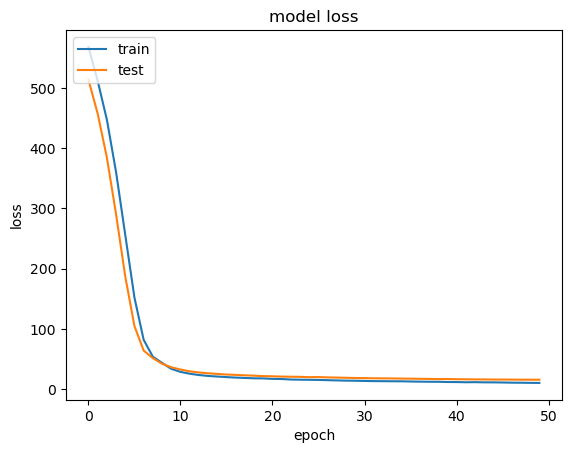

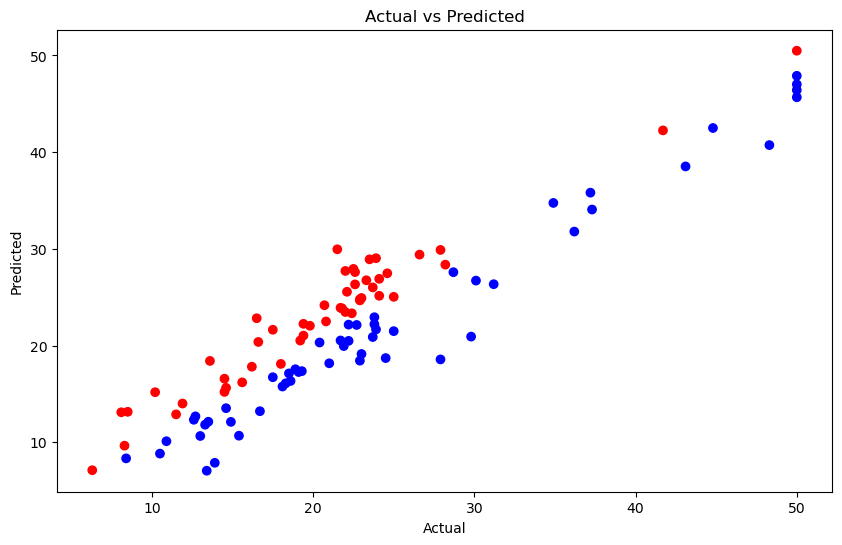

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#reading the dataset
data=pd.read_csv("1_boston_housing.csv")


#dataset 
data.head()


#checking null values
data.isnull().sum()


x=data.drop('MEDV',axis=1)


y=data['MEDV']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


#model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128,input_shape = (13,),activation = 'relu',name='dense_1'))
model.add(Dense(64,activation = 'relu',name = 'dense_2'))
model.add(Dense(1,activation='linear',name='dense_output'))

model.compile(optimizer = 'adam',loss='mse',metrics=['mae'])
model.summary()



history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2)


mse,mae=model.evaluate(x_test,y_test)
print("mse:",mse)
print("mae:",mae)


y_pred = model.predict(x_test[:])


p=[]
for i in y_pred:
    p.append(list(i)[0])
    
    
d = pd.DataFrame({'actual':y_test,'predicted':p})
d


import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


import pandas as pd
import matplotlib.pyplot as plt

# Assuming y_test contains the actual values and p contains the predicted values
d = pd.DataFrame({'Actual': y_test, 'Predicted': p})

# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(d['Actual'], d['Predicted'], c=['blue' if a > p else 'red' for a, p in zip(d['Actual'], d['Predicted'])])
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()